In [ ]:
# Instalar bibliotecas (descomente se rodar localmente)
# !pip install pandas

import pandas as pd

# Carregar dados diretamente do GitHub
url = 'https://raw.githubusercontent.com/adirsonmfjr/Dados-de-Pasto-/main/pasture_reduzido_utf8.csv'
df = pd.read_csv(url)

# Visualizar amostra e estrutura
print(df.head())
df.info()


      biome state  municipality  geocode          1985          1986  \
0  Amazônia  Acre    Acrelândia  1200013   8103.505678  10161.630195   
1  Amazônia  Acre  Assis Brasil  1200054   2672.540132   2977.209540   
2  Amazônia  Acre     Brasiléia  1200104  26648.235411  32266.063511   
3  Amazônia  Acre        Bujari  1200138  35221.618027  38443.698055   
4  Amazônia  Acre      Capixaba  1200179  19633.686098  21780.273727   

           1987          1988          1989          1990  ...           2014  \
0  13294.535859  16073.930879  17871.934604  19644.743497  ...  118796.115670   
1   3187.392127   3397.966695   4036.592894   4327.388475  ...   19053.037216   
2  35948.887271  39345.816201  42823.427513  44541.505882  ...  117883.103172   
3  40299.713741  42739.618846  46490.983466  50116.764843  ...  109720.136988   
4  23649.556182  25711.982460  28985.872300  30523.606315  ...   78326.168890   

            2015           2016           2017           2018           2019  \


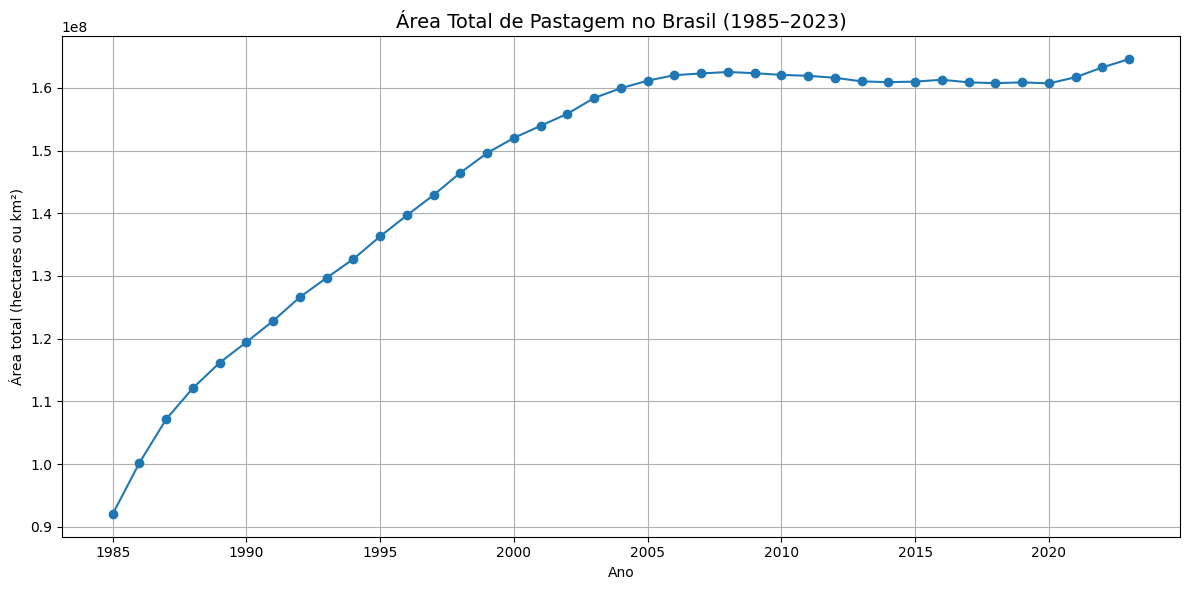

In [ ]:
# Somar área total de pastagem no Brasil por ano
anos = [str(ano) for ano in range(1985, 2024)]
pasto_total_por_ano = df[anos].sum()

# Plotar gráfico
plt.figure(figsize=(12, 6))
pasto_total_por_ano.plot(marker='o')
plt.title('Área Total de Pastagem no Brasil (1985–2023)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Área total (hectares ou km²)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Calcular a média da área total para o triênio 1985-1987
media_1985_87 = df[['1985', '1986', '1987']].sum().mean()

# Calcular a média da área total para o triênio 2021-2023
media_2021_23 = df[['2021', '2022', '2023']].sum().mean()

# Mostrar os resultados
print(f"Média de área total de pastagem no Brasil (1985–1987): {media_1985_87:.2f}")
print(f"Média de área total de pastagem no Brasil (2021–2023): {media_2021_23:.2f}")


Média de área total de pastagem no Brasil (1985–1987): 99823127.04
Média de área total de pastagem no Brasil (2021–2023): 163169619.48


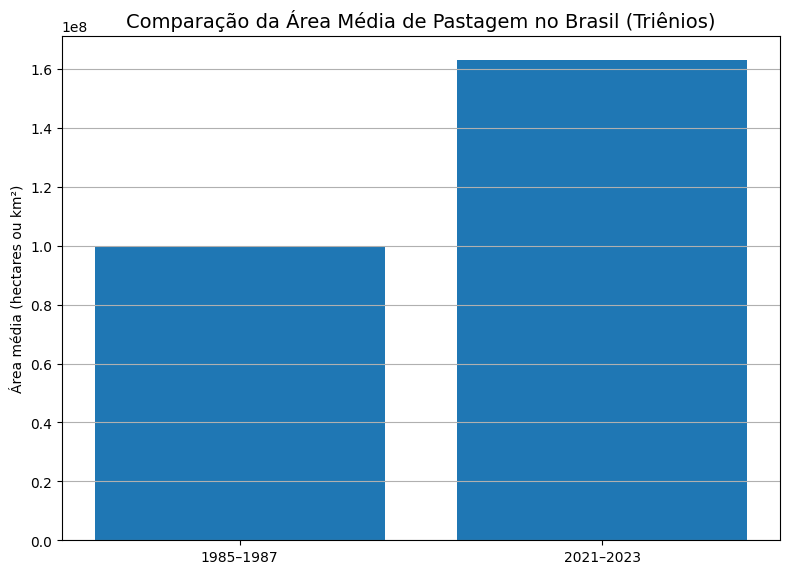

In [ ]:
# Dados para o gráfico
trienios = ['1985–1987', '2021–2023']
medias = [media_1985_87, media_2021_23]

# Plotar gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(trienios, medias)
plt.title('Comparação da Área Média de Pastagem no Brasil (Triênios)', fontsize=14)
plt.ylabel('Área média (hectares ou km²)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import geopandas as gpd

# Carregar o shapefile dos municípios
mapa = gpd.read_file("BR_Municipios_2023.shp")
mapa['CD_MUN'] = mapa['CD_MUN'].astype(int)

# Calcular a média dos triênios por município
df['media_1985_87_mun'] = df[['1985', '1986', '1987']].mean(axis=1)
df['media_2021_23_mun'] = df[['2021', '2022', '2023']].mean(axis=1)

# Agrupar por município (soma se houver vários registros por município)
df_municipios = df.groupby('geocode')[['media_1985_87_mun', 'media_2021_23_mun']].sum().reset_index()

# Mesclar o shapefile com os dados
mapa_pasto = mapa.merge(df_municipios, left_on='CD_MUN', right_on='geocode', how='left')


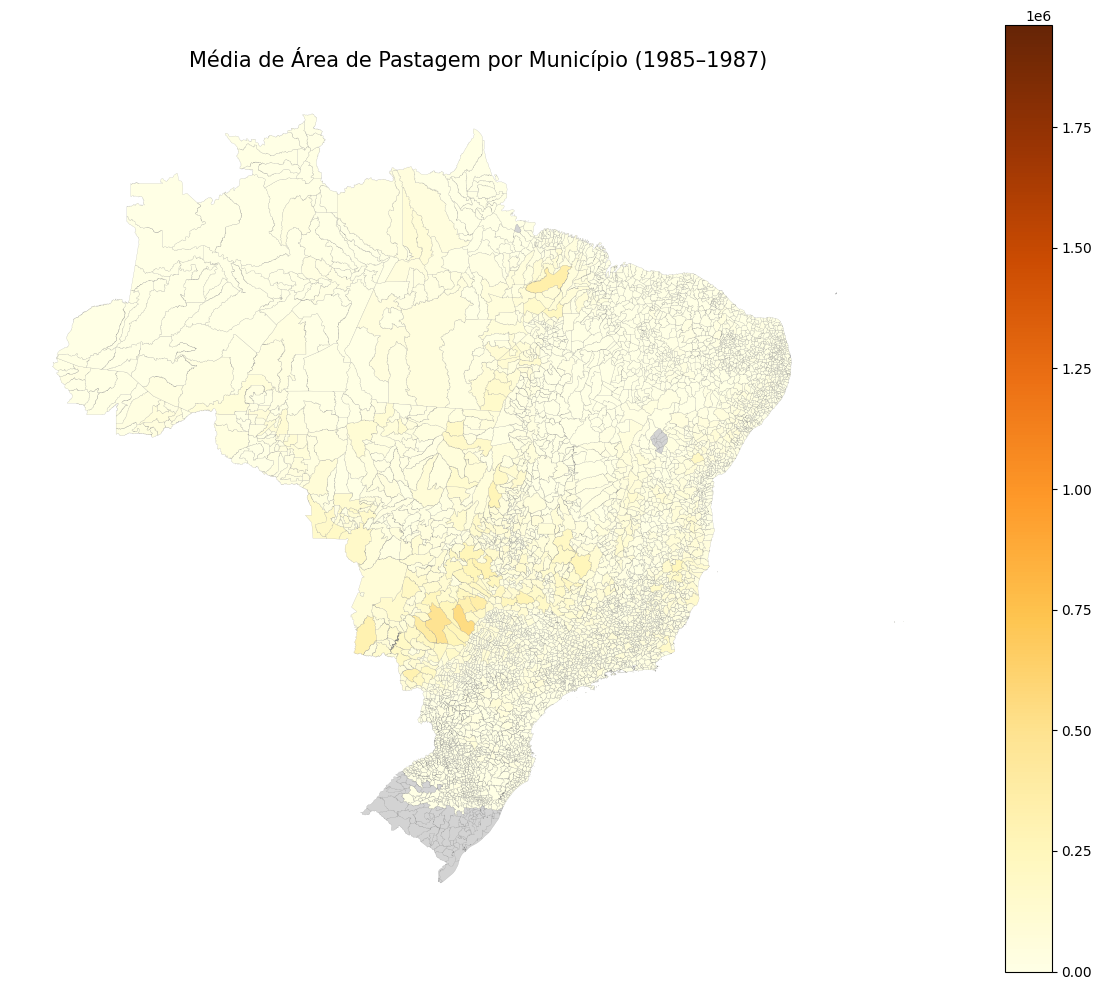

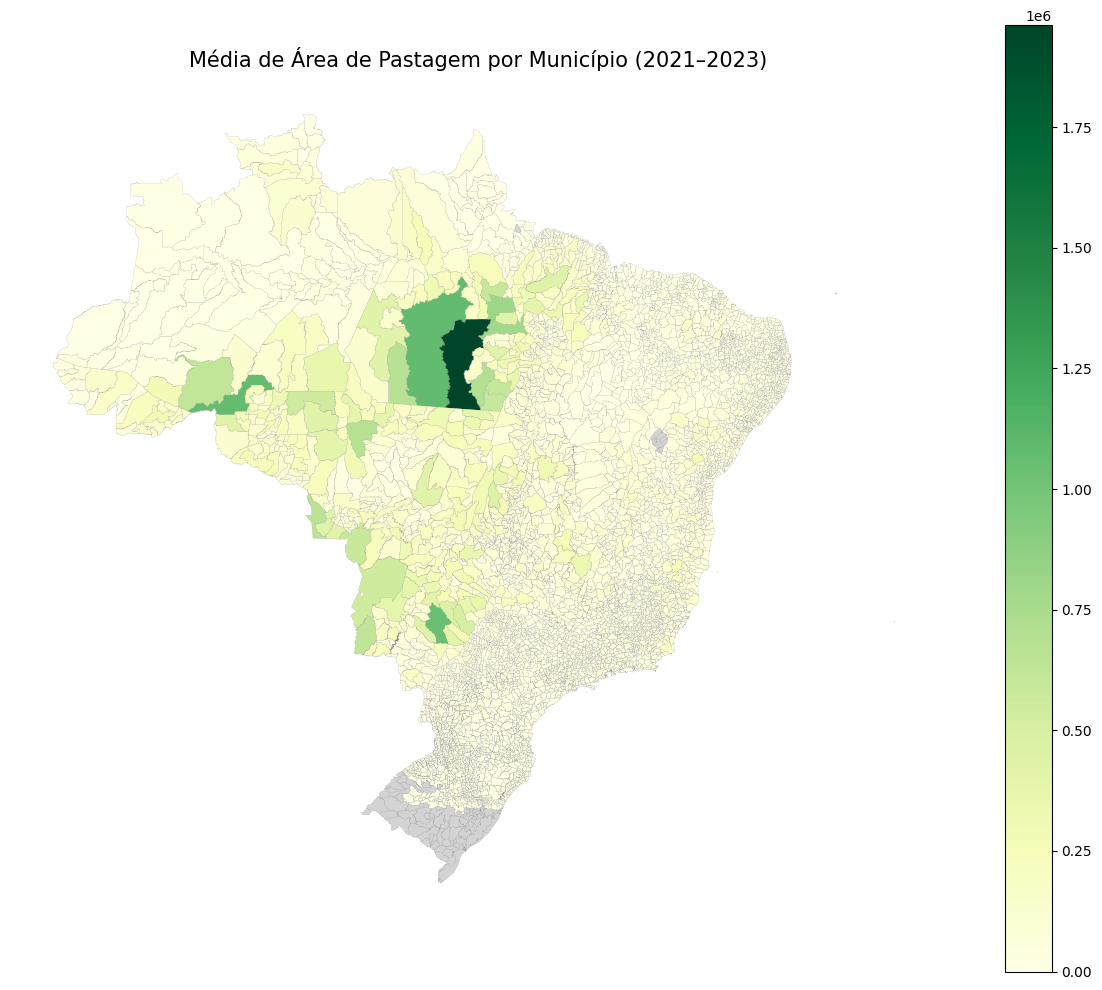

In [ ]:
# Definir limites comuns para as escalas
vmin = min(mapa_pasto[['media_1985_87_mun', 'media_2021_23_mun']].min())
vmax = max(mapa_pasto[['media_1985_87_mun', 'media_2021_23_mun']].max())

# Mapa triênio 1985–1987
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_pasto.plot(column='media_1985_87_mun', cmap='YlOrBr', linewidth=0.1, edgecolor='0.5',
                legend=True, ax=ax, vmin=vmin, vmax=vmax,
                missing_kwds={"color": "lightgrey", "label": "Sem dado"})
ax.set_title('Média de Área de Pastagem por Município (1985–1987)', fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# Mapa triênio 2021–2023
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_pasto.plot(column='media_2021_23_mun', cmap='YlGn', linewidth=0.1, edgecolor='0.5',
                legend=True, ax=ax, vmin=vmin, vmax=vmax,
                missing_kwds={"color": "lightgrey", "label": "Sem dado"})
ax.set_title('Média de Área de Pastagem por Município (2021–2023)', fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()
